<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gray-Scale-Images-(Single-Channel)" data-toc-modified-id="Gray-Scale-Images-(Single-Channel)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gray-Scale Images (Single Channel)</a></span></li><li><span><a href="#RGB-Images" data-toc-modified-id="RGB-Images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RGB Images</a></span></li></ul></div>

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

- Again, we have the following cell. Modify it depending on your platform, colab/local.

In [25]:
colab=False
if colab:        
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    #make sure this path is correct, you will first get "file does not exist" error, fix the path
    cat_dir = "/content/drive/MyDrive/Intro2DeepLearning/master-group/notebooks/data/kitten.png"
    chipmonk_dir = "/content/drive/MyDrive/Intro2DeepLearning/group-1/notebooks/figures/chipmonk.jpg"
else:
    cat_dir = "data/kitten.png"
    chipmonk_dir = "data/chipmonk.jpg"

## Gray-Scale Images (Single Channel)

- A gray scale image of size Height x Width is an array(matrix) of size Height x Width.


- Let's call this array A. Then $A[i,j]$ is a value between **0 (Black) and 255 (White)**

- As a convention, upper left corner is (0,0) and x increases from left to right while y incresases from top to bottom. 

In [3]:
#If I have 4x4 gray-scale image, it looks like as follows.
# Each entry holds a "scalar"
A = np.random.randint(0,255,size=(4,4))
A

array([[ 51, 191,  65,  35],
       [221, 116, 118, 125],
       [143,  27, 152, 118],
       [237, 253, 183, 238]])

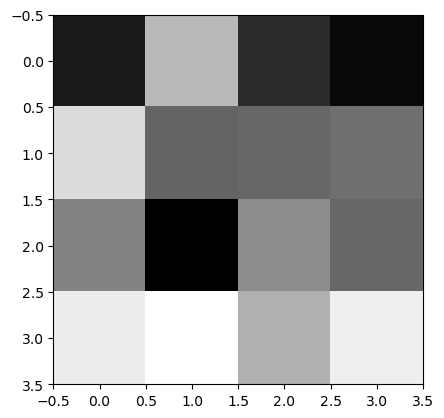

In [4]:
plt.imshow(A,cmap='gray')
plt.show()

In [5]:
print(A[2,0]) 
print(A[3,3]) 

143
238


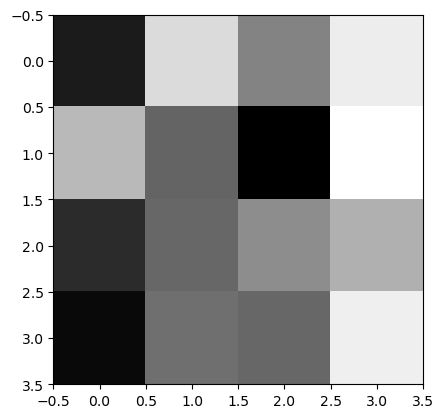

In [6]:
#switch rows and cols
At = A.transpose()
plt.imshow(At,cmap='gray')
plt.show()

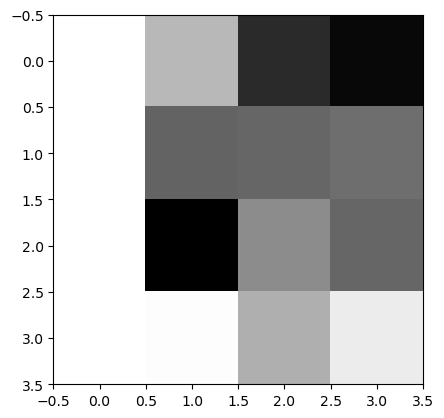

In [7]:
#Here is some trick
A[:,0] = 255; # all rows and first coloumns
A
plt.imshow(A,cmap='gray')
plt.show()

In [8]:
A_flat =  A.flatten()
print(A)
print(A_flat)

[[255 191  65  35]
 [255 116 118 125]
 [255  27 152 118]
 [255 253 183 238]]
[255 191  65  35 255 116 118 125 255  27 152 118 255 253 183 238]


In [9]:
A_flat.size

16

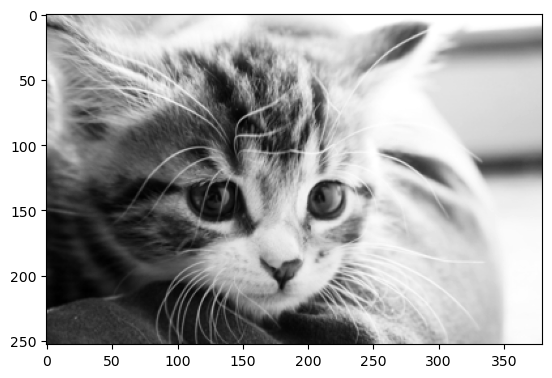

In [10]:
#find kitten.pnd in 
img = np.array(Image.open(cat_dir))
plt.imshow(img,cmap='gray')
plt.show()

In [11]:
print('height X width: ',img.shape)

height X width:  (253, 380)


In [12]:
#notice the black and white spots
print(img)

[[163 169 169 ... 255 255 255]
 [179 184 176 ... 255 255 255]
 [169 184 195 ... 255 255 255]
 ...
 [ 44  46  47 ... 248 248 248]
 [ 44  45  47 ... 248 247 247]
 [ 37  41  42 ... 249 247 247]]


In [13]:
#pixel value at [150,140], close to left eye.
print(img[150,140])

20


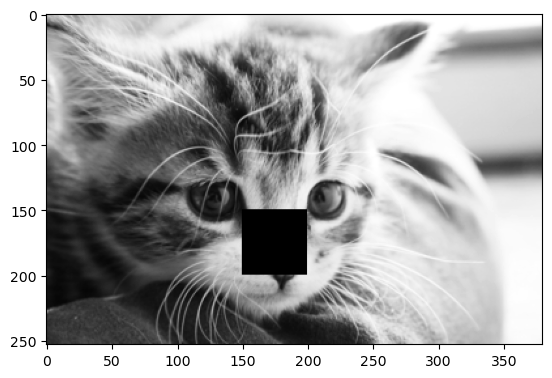

In [14]:
#what will happen?
imgnew = img.copy()
imgnew[150:200,150:200] = 0 # all pixels in these intervals...
plt.imshow(imgnew,cmap='gray')
plt.show()

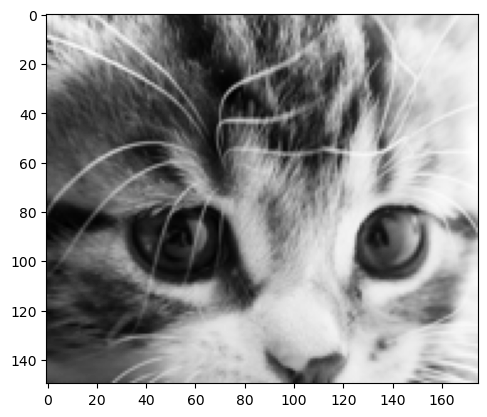

In [15]:
#trim the image
img2 = img[50:200,75:250]
plt.imshow(img2,cmap='gray')
plt.show()

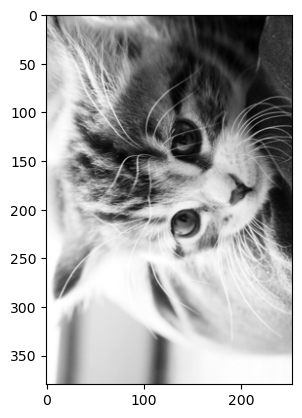

In [16]:
#what will happen?
imgnew = img.transpose()
plt.imshow(imgnew,cmap='gray')
plt.show()

## RGB Images 

In [17]:
#If I have 4x4 rgb image, it looks like
# read it like we have 4x4 matrix and we hold an array of size-3 in each entry
#A[0,0]--first row in the line a=nd etc
A = np.random.randint(0,255,size=(4,4,3))
A

array([[[ 83, 169, 101],
        [121, 134,  61],
        [155, 159,  67],
        [190,  94, 180]],

       [[ 56,  14, 214],
        [161, 103, 226],
        [193, 220, 172],
        [ 21, 214, 116]],

       [[118, 161,  35],
        [163,  89,  95],
        [218, 116, 216],
        [ 60, 129, 207]],

       [[239, 133, 174],
        [ 97, 209,  67],
        [217, 107, 230],
        [174, 131, 196]]])

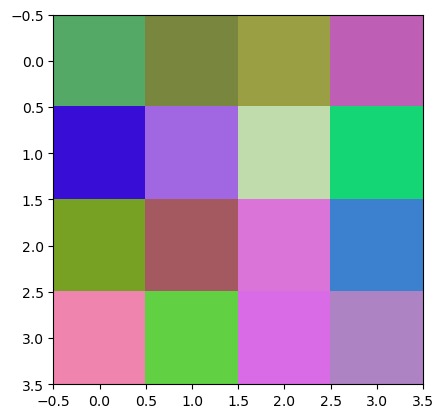

In [18]:
plt.imshow(A)
plt.show()

In [19]:
# R-G-B
print(A[1,0]) 

[ 56  14 214]


In [20]:
# This system means we actually have around 16M colours...
256*256*256

16777216

In [21]:
print(A[3,2,0]) #red
print(A[3,2,1]) #green
print(A[3,2,2]) #blue

217
107
230


In [22]:
print(A[:,:,0]) #red channel
print('=================')
print(A[:,:,1]) #blue channel
print('=================')
print(A[:,:,2]) #green channel

[[ 83 121 155 190]
 [ 56 161 193  21]
 [118 163 218  60]
 [239  97 217 174]]
[[169 134 159  94]
 [ 14 103 220 214]
 [161  89 116 129]
 [133 209 107 131]]
[[101  61  67 180]
 [214 226 172 116]
 [ 35  95 216 207]
 [174  67 230 196]]


In [23]:
(A.flatten()).size

48

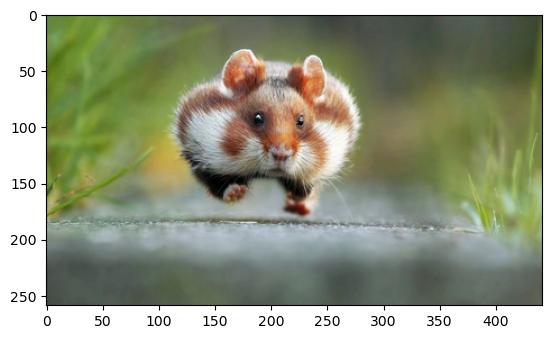

In [26]:
imgRGB = np.array(Image.open(chipmonk_dir))
plt.imshow(imgRGB)
plt.show()

In [28]:
print('height X width X channel: ',imgRGB.shape)

height X width X channel:  (259, 442, 3)


In [29]:
print('Left-upper corner: ',imgRGB[0,0])    # must be more green here..
print('Center-ish: ',imgRGB[100,200]) # more red

Left-upper corner:  [101 130  63]
Center-ish:  [135  84  67]


In [30]:
print(imgRGB[100,200,0]) #red 
print(imgRGB[100,200,1]) #green
print(imgRGB[100,200,2]) #blue

135
84
67


In [31]:
#using the same idea we can return channels seperately
temp_red = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_red[:,:,0] = imgRGB[:,:,0]

temp_green = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_green[:,:,1] = imgRGB[:,:,1]

temp_blue = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_blue[:,:,2] = imgRGB[:,:,2]

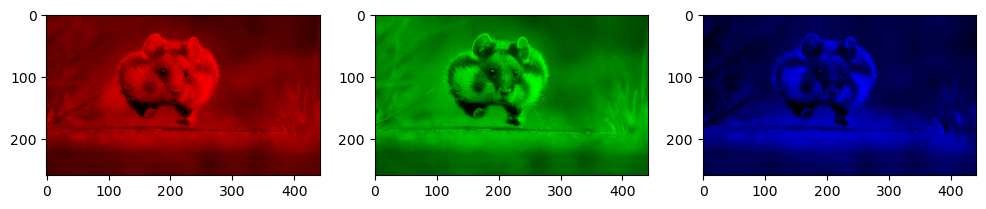

In [32]:
fig,ax =  plt.subplots(1,3,figsize=(12,5))
ax[0].imshow(temp_red)
ax[1].imshow(temp_green)
ax[2].imshow(temp_blue)
plt.show()